In [63]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
data = pd.DataFrame({
     "potencia":[120, 80, 100, 110, 90, 130, 70, 105, 115, 85],
     "eficiencia":[92,65,75,85,68,95,60,80,88,70],
     "idade":[3,8,5,4,7,2,10,6,3,9],
     "tamanho": [50,45,55,60,48,62,40,58,56,47],
     "consumoEnergia":['eficiente','ineficiente','ineficiente','eficiente','ineficiente','eficiente','ineficiente','eficiente','eficiente','ineficiente']
})

In [65]:
X = data[['potencia', 'eficiencia', 'idade','tamanho']]

y = data['consumoEnergia']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)

In [67]:
model = SVC(kernel= 'linear') # crio o modelo SVC
model.fit(X_train,y_train) # treino o modelo

SVC(kernel='linear')

In [68]:
y_pred = model.predict(X_test)

In [69]:
X_test

,potencia,eficiencia,idade,tamanho
8,115,88,3,56
1,80,65,8,45
5,130,95,2,62


In [70]:
data.head(10)

,potencia,eficiencia,idade,tamanho,consumoEnergia
0,120,92,3,50,eficiente
1,80,65,8,45,ineficiente
2,100,75,5,55,ineficiente
3,110,85,4,60,eficiente
4,90,68,7,48,ineficiente
5,130,95,2,62,eficiente
6,70,60,10,40,ineficiente
7,105,80,6,58,eficiente
8,115,88,3,56,eficiente
9,85,70,9,47,ineficiente


In [71]:
acuracy = accuracy_score(y_pred,y_test)
print(acuracy)

1.0


In [72]:
classi_re = classification_report(y_pred,y_test)
print(classi_re)

              precision    recall  f1-score   support

   eficiente       1.00      1.00      1.00         2
 ineficiente       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [73]:
cm = confusion_matrix(y_pred,y_test)

Text(0.5, 1.0, 'Matriz de confusão para o algoritmo SVM')

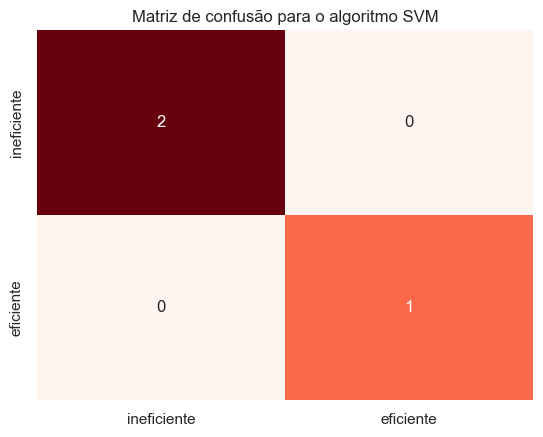

In [74]:
sns.heatmap(cm,annot=True, fmt='d', cmap='Reds', cbar=False, 
            xticklabels=['ineficiente', 'eficiente'], 
            yticklabels=['ineficiente','eficiente'])    
                         
plt.title('Matriz de confusão para o algoritmo SVM') 

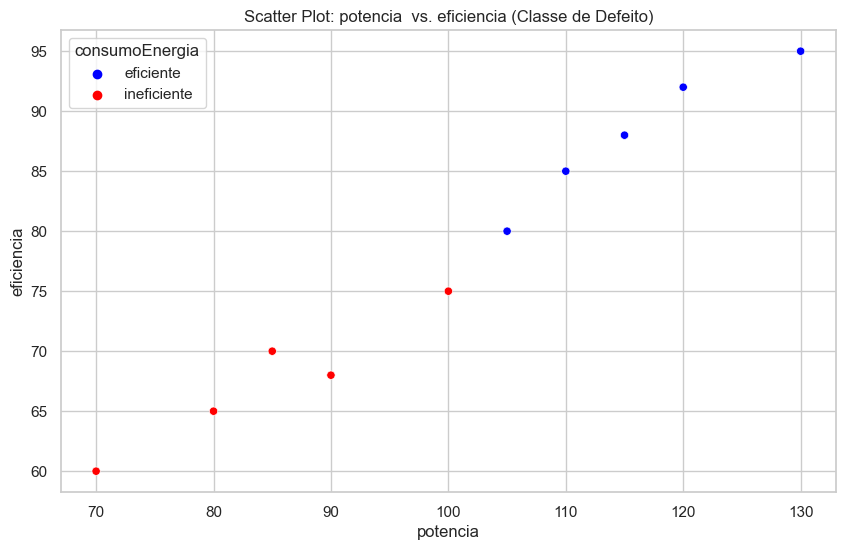

In [75]:
sns.set(style="whitegrid")
# Mapeando as cores com base na classe
palette = {"ineficiente": "red", "eficiente": "blue"}
# Criando o scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='potencia', y='eficiencia', hue='consumoEnergia', data=data, palette= palette)

# Personalizando o gráfico
plt.title('Scatter Plot: potencia  vs. eficiencia (Classe de Defeito)')


# Mostrando o gráfico
plt.legend(title='consumoEnergia')
plt.show()